# ASDS 6304 - Project 2
Soham Neeraj Agarkar & Utkarsh Pant on September 27, 2024.

## Part 1. PCA on the Wine Dataset

### Task 1.1. Data Preparation
Load the Wine dataset and normalize the features. Why is feature normalization important when applying PCA? 

In [1]:
from sklearn.decomposition import PCA, KernelPCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
wine_data = pd.read_csv('./wine_dataset-1.csv')
wine_data.columns = wine_data.columns.str.replace(' ', '_').str.lower()
x = wine_data.drop('class', axis=1)
y = wine_data['class']

**Normalization of features is important when applying PCA,** since the difference in the scale of each feature may cause it to have an erroneously larger or smaller projection in lower dimensions, thus skewing the results incorrectly.

_Question to consider: what is the difference between "normalization" and "standardization," and when should we prefer one over the other?_

We're using the __Standard Scaler__ to scale our data to approximately match the Standard Normal distribution.

In [3]:
scaler = StandardScaler()
scaler.fit(x)
wine_data_scaled = scaler.transform(x)

wine_data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Now that the data has been scaled, we can apply PCA to it.

### Task 1.2. Apply PCA

__Apply PCA to reduce the dimensionality of the Wine dataset. Keep enough principal components to explain 90% of the variance. How many principal components are required to capture 90% of the variance?__


In [4]:
pca = PCA(n_components=0.9)
pca.fit(wine_data_scaled)
wine_data_pca = pca.transform(wine_data_scaled)

wine_data_pca.shape

(178, 8)

From the above result, we can see that we need __8__ features to explain 90% of the variance in the data. This was achieved by setting `n_components=0.9` in the `PCA` constructor, which means that the solver automatically determines the right number of principal components to explain the given percentage of variance.  

In [5]:
# Kernel PCA on the wine dataset
kpca = KernelPCA(n_components=8, kernel='rbf', fit_inverse_transform=True)
wine_data_kpca = kpca.fit_transform(wine_data_scaled)

# Sparse PCA on the wine dataset
spca = SparsePCA(n_components=8)
wine_data_spca = spca.fit_transform(wine_data_scaled)

__Plot the explained variance ratio and the cumulative explained variance. What does this tell you about the dataset?__

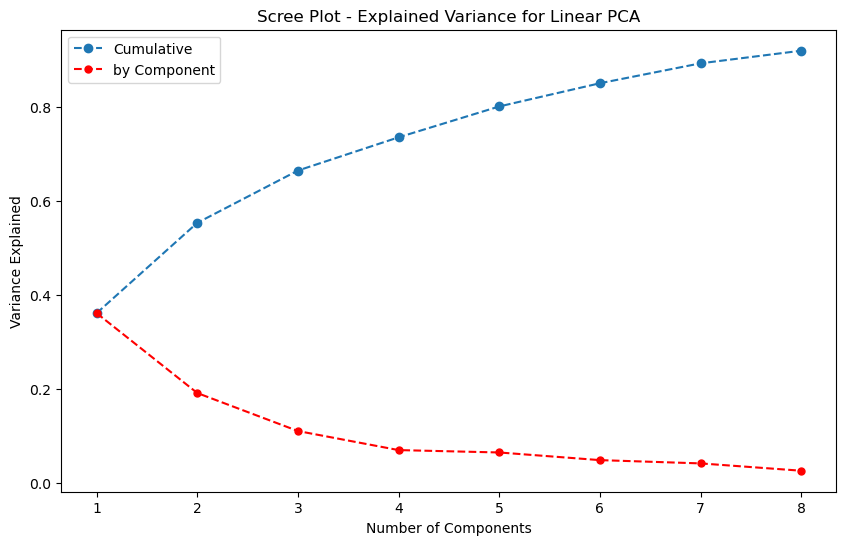

In [6]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_evr = np.cumsum(explained_variance_ratio)

plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_evr) + 1),
         cumulative_evr, marker='o', linestyle='--')
# adding scree plot for variance explained by each component
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
         marker='o', markersize=5, color='red', linestyle='--')
plt.title('Scree Plot - Explained Variance for Linear PCA')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.legend(['Cumulative', 'by Component'])

plt.show()

The above Scree Plot shows us that each principal component in the data captures slightly more more variance in the data than the lower-dimensional component, and PCA is effective for the Wine Dataset, since we go from about __14__ to __8__ features - a 43% reduction in dimensionality!

### Task 1.3. Visualize and Interpret Results

__Plot the data in the first two principal component spaces. Can you see clear separation between the three wine cultivars?__

From the Scree plot above, we can see that PC1 and PC2 explain the greatest variance between them, so we can use them to visualize our results. This plot should show the clearest class differentiation!

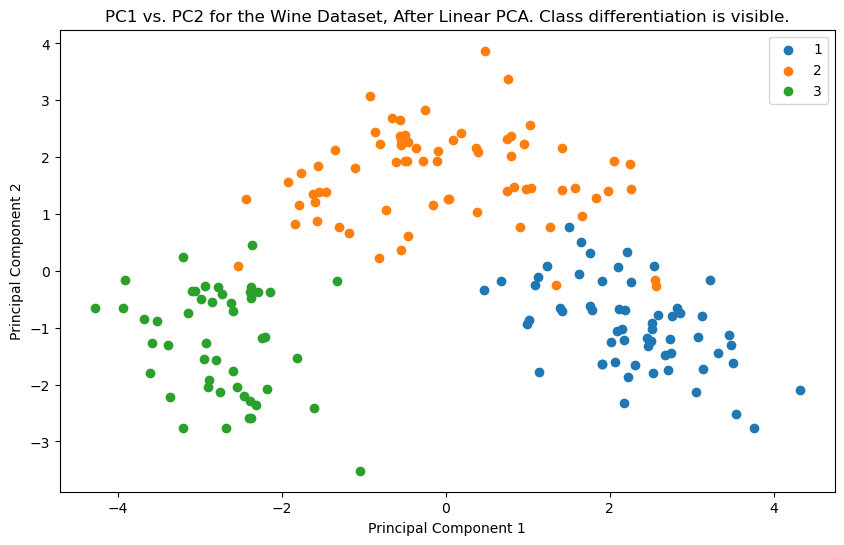

In [7]:
reduced_wine_data = pd.DataFrame(wine_data_pca, columns=[f'PC{i}' for i in range(1, wine_data_pca.shape[1] + 1)])
reduced_wine_data['class'] = y


plt.figure(figsize=(10, 6))
for class_value in y.unique():
    subset = reduced_wine_data[reduced_wine_data['class'] == class_value]
    plt.scatter(x=subset['PC1'], y=subset['PC2'], label=class_value)
plt.legend()
plt.title('PC1 vs. PC2 for the Wine Dataset, After Linear PCA. Class differentiation is visible.')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

__Reconstruct the original dataset from the reduced PCA components. What
information is lost when reducing the dimensionality?__

In [8]:
reconstructed_wine_data_lpca = pca.inverse_transform(wine_data_pca)
reconstructed_wine_data_kpca = kpca.inverse_transform(wine_data_kpca)
reconstructed_wine_data_spca = spca.inverse_transform(wine_data_spca)

reconstruction_error_wine_lpca = np.mean(np.square(wine_data_scaled - reconstructed_wine_data_lpca))
reconstruction_error_wine_kpca = np.mean(np.square(wine_data_scaled - reconstructed_wine_data_kpca))
reconstruction_error_wine_spca = np.mean(np.square(wine_data_scaled - reconstructed_wine_data_spca))
print(f'Reconstruction Error (Mean Square Error) Linear PCA: {reconstruction_error_wine_lpca}')
print(f'Reconstruction Error (Mean Square Error) Kernel PCA: {reconstruction_error_wine_kpca}')
print(f'Reconstruction Error (Mean Square Error) Sparse PCA: {reconstruction_error_wine_spca}')

Reconstruction Error (Mean Square Error) Linear PCA: 0.0798245565422737
Reconstruction Error (Mean Square Error) Kernel PCA: 0.34051048090707653
Reconstruction Error (Mean Square Error) Sparse PCA: 0.09122242442595138


## Part 2. Kernel PCA on the Digits Dataset

### Task 2.1. Data Preparation

__Load the Digits dataset using `sklearn.datasets.load_digits()`. Visualize some of the digits using `matplotlib`.__

In [9]:
digits = load_digits()
digits_data = digits.data
digits_target = digits.target

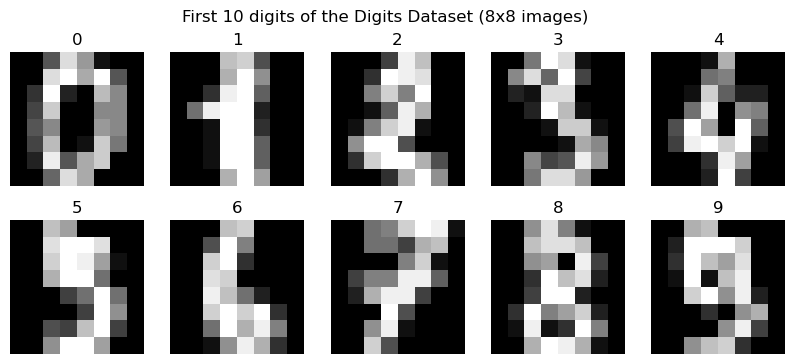

In [10]:
# visualise the first 10 digits
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
plt.style.use('default')
plt.suptitle('First 10 digits of the Digits Dataset (8x8 images)')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits_data[i].reshape(8, 8), cmap='gray')
    plt.title(digits_target[i])
    plt.axis('off')
plt.show()

### Task 2.2. Apply Kernel PCA with the RBF Kernel.

__Apply Kernel PCA using an RBF kernel to reduce the dimensionality of the
dataset.__

In [11]:
# scale the data
scaler = StandardScaler()
scaler.fit(digits_data)
digits_data_scaled = scaler.transform(digits_data)

# apply Kernel PCA
kpca = KernelPCA(kernel='rbf', gamma=0.01, fit_inverse_transform=True)
digits_kpca = kpca.fit_transform(digits_data_scaled)

# apply linear and sparse PCA
pca = PCA(n_components=0.9)
digits_lpca = pca.fit_transform(digits_data_scaled)
spca = SparsePCA(n_components=None)
digits_spca = spca.fit_transform(digits_data_scaled)

__Visualize the data in the 2D space of the first two kernel principal components.
What do you observe?__

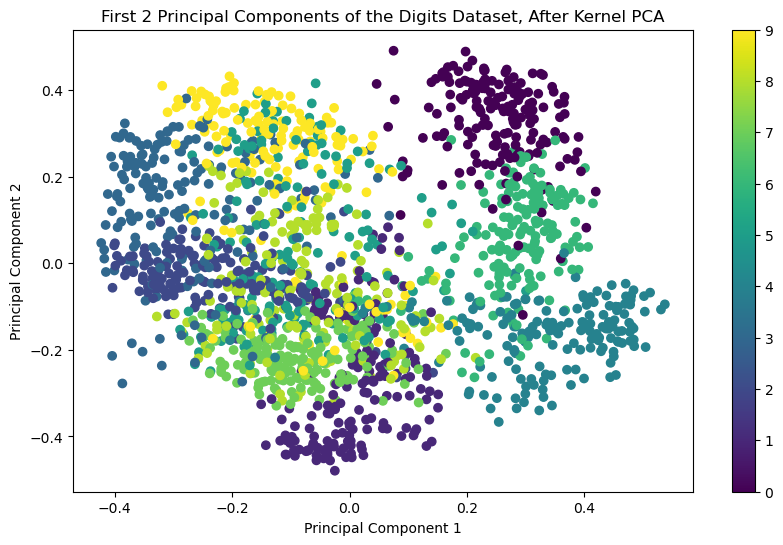

In [12]:
# visualizing the first 2 PC's in 2D space

plt.figure(figsize=(10, 6))
plt.scatter(x=digits_kpca[:, 0], y=digits_kpca[:, 1], c=digits_target, cmap='viridis')
plt.title('First 2 Principal Components of the Digits Dataset, After Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

### Task 2.3. Compare with Linear PCA

__Apply standard PCA to reduce the data to 2 components. Plot the results and
compare them with Kernel PCA results.__

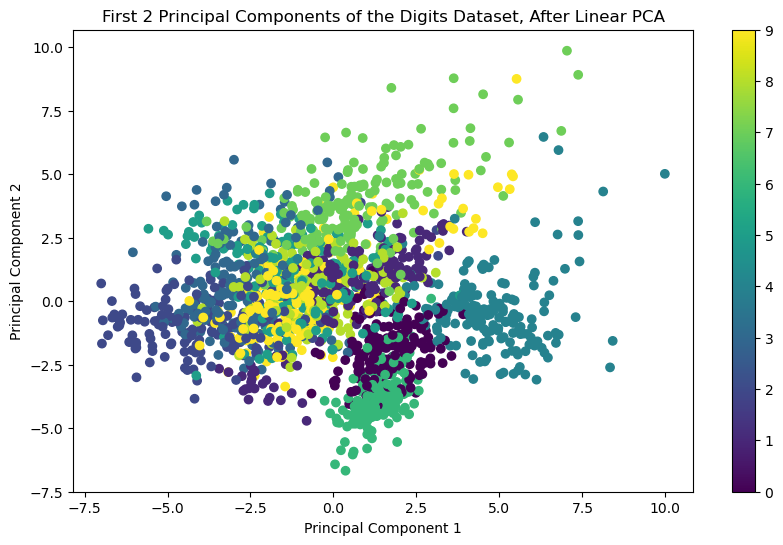

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x=digits_lpca[:, 0], y=digits_lpca[:, 1], c=digits_target, cmap='viridis')
plt.title('First 2 Principal Components of the Digits Dataset, After Linear PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


Here, we can see that Kernel PCA was able to obtain __much better class differentiation than linear PCA.__

### Task 2.4. Interpretation and Evaluation.

__Reconstruct the original data from the reduced components. Compare the reconstruction errors for both methods.__

> #### Referenced discussion
> [Stats StackExchange: How to choose a kernel for kernel PCA?](https://stats.stackexchange.com/questions/131142/how-to-choose-a-kernel-for-kernel-pca) 

In [14]:
digits_reconstructed_kpca = kpca.inverse_transform(digits_kpca)
digits_reconstructed_lpca = pca.inverse_transform(digits_lpca)
digits_reconstructed_spca = spca.inverse_transform(digits_spca)

reconstruction_error_digits_kpca = np.mean(np.square(digits_data_scaled - digits_reconstructed_kpca))
reconstruction_error_digits_lpca = np.mean(np.square(digits_data_scaled - digits_reconstructed_lpca))
reconstruction_error_digits_spca = np.mean(np.square(digits_data_scaled - digits_reconstructed_spca))

print(f'Reconstruction Error (Mean Square Error) for Kernel PCA: {reconstruction_error_digits_kpca}')
print(f'Reconstruction Error (Mean Square Error) for PCA: {reconstruction_error_digits_lpca}')
print(f'Reconstruction Error (Mean Square Error) for Sparse PCA: {reconstruction_error_digits_spca}')

Reconstruction Error (Mean Square Error) for Kernel PCA: 0.4721858946738644
Reconstruction Error (Mean Square Error) for PCA: 0.09487000241752752
Reconstruction Error (Mean Square Error) for Sparse PCA: 9.114453776024784e-05


## Part 3: Sparse PCA on the Breast Cancer Dataset

### Task 3.1. Data Preparation

__Load and normalize the Breast Cancer dataset. Why might Sparse PCA be
useful in this context?__

In [15]:
breast_cancer_data = pd.read_csv('./breast_cancer_dataset.csv')

breast_cancer_data.columns = breast_cancer_data.columns.str.replace(
    ' ', '_').str.lower()
# drop the id and disgnosis columns for x
x = breast_cancer_data.drop(['id', 'diagnosis'], axis=1)
y = breast_cancer_data['diagnosis']
x.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# standard scale the data
scaler = StandardScaler()
scaler.fit(x)
breast_cancer_data_scaled = scaler.transform(x)

Applying Sparse PCA on the dataset after scaling it:

In [17]:
sparse_pca = SparsePCA(n_components=2, alpha=0.1)
sparse_pca.fit(breast_cancer_data_scaled)
breast_cancer_data_sparse_pca = sparse_pca.transform(breast_cancer_data_scaled)

Applying Linear and Kernel PCA for comparison:

In [18]:
linear_pca = PCA(n_components=2)
linear_pca.fit(breast_cancer_data_scaled)
breast_cancer_data_pca = linear_pca.transform(breast_cancer_data_scaled)

KernelPCA = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
KernelPCA.fit(breast_cancer_data_scaled)
breast_cancer_data_kpca = KernelPCA.transform(breast_cancer_data_scaled)

### Task 3.4. Reconstruction and Comparison

__Reconstruct the original dataset from the sparse principal components. Compare the reconstruction error with that of regular PCA.__

In [19]:
reconstructed_breast_cancer_data_spca = sparse_pca.inverse_transform(
    breast_cancer_data_sparse_pca)

reconstructed_breast_cancer_data_lpca = linear_pca.inverse_transform(
    breast_cancer_data_pca)

reconstructed_breast_cancer_data_kpca = linear_pca.inverse_transform(
    breast_cancer_data_kpca)


reconstruction_error_breast_cancer_sparse_pca = np.mean(
    np.square(breast_cancer_data_scaled - reconstructed_breast_cancer_data_spca))
print(f'Reconstruction Error (Mean Square Error) for Sparse PCA: {
      reconstruction_error_breast_cancer_sparse_pca}')

reconstruction_error_breast_cancer_lpca = np.mean(
    np.square(breast_cancer_data_scaled - reconstructed_breast_cancer_data_lpca))
print(f'Reconstruction Error (Mean Square Error) for PCA: {
      reconstruction_error_breast_cancer_lpca}')

reconstruction_error_breast_cancer_kpca = np.mean(
    np.square(breast_cancer_data_scaled - reconstructed_breast_cancer_data_kpca))
print(f'Reconstruction Error (Mean Square Error) for PCA: {
      reconstruction_error_breast_cancer_kpca}')

Reconstruction Error (Mean Square Error) for Sparse PCA: 0.36763944298781615
Reconstruction Error (Mean Square Error) for PCA: 0.3675679234844056
Reconstruction Error (Mean Square Error) for PCA: 1.0375589702179815


In this case, both methods achieve a similar error in reconstructed data.

## Part 4: General Comparison of PCA, Kernel PCA, and Sparse PCA

### Task 4.1. Summary Comparison

__Compare the reconstruction errors for PCA, Kernel PCA, and Sparse PCA
across the three datasets.__

In [20]:
# reconstruction error comparison table across all datasets
reconstruction_error_data = {
    'Dataset': ['Wine', 'Digits', 'Breast Cancer'],
    'PCA': [reconstruction_error_wine_lpca, reconstruction_error_digits_lpca, reconstruction_error_breast_cancer_lpca],
    'Kernel PCA': [reconstruction_error_wine_kpca, reconstruction_error_digits_kpca, reconstruction_error_breast_cancer_kpca],
    'Sparse PCA': [reconstruction_error_wine_spca, reconstruction_error_digits_spca, reconstruction_error_breast_cancer_sparse_pca]
}

reconstruction_errors = pd.DataFrame(reconstruction_error_data)
reconstruction_errors

,Dataset,PCA,Kernel PCA,Sparse PCA
0,Wine,0.079825,0.340510,0.091222
1,Digits,0.094870,0.472186,0.000091
2,Breast Cancer,0.367568,1.037559,0.367639


### Task 4.2. Visualization Comparison

__For each dataset, visualize the first two principal components (or kernel
components) obtained through PCA, Kernel PCA, and Sparse PCA.__

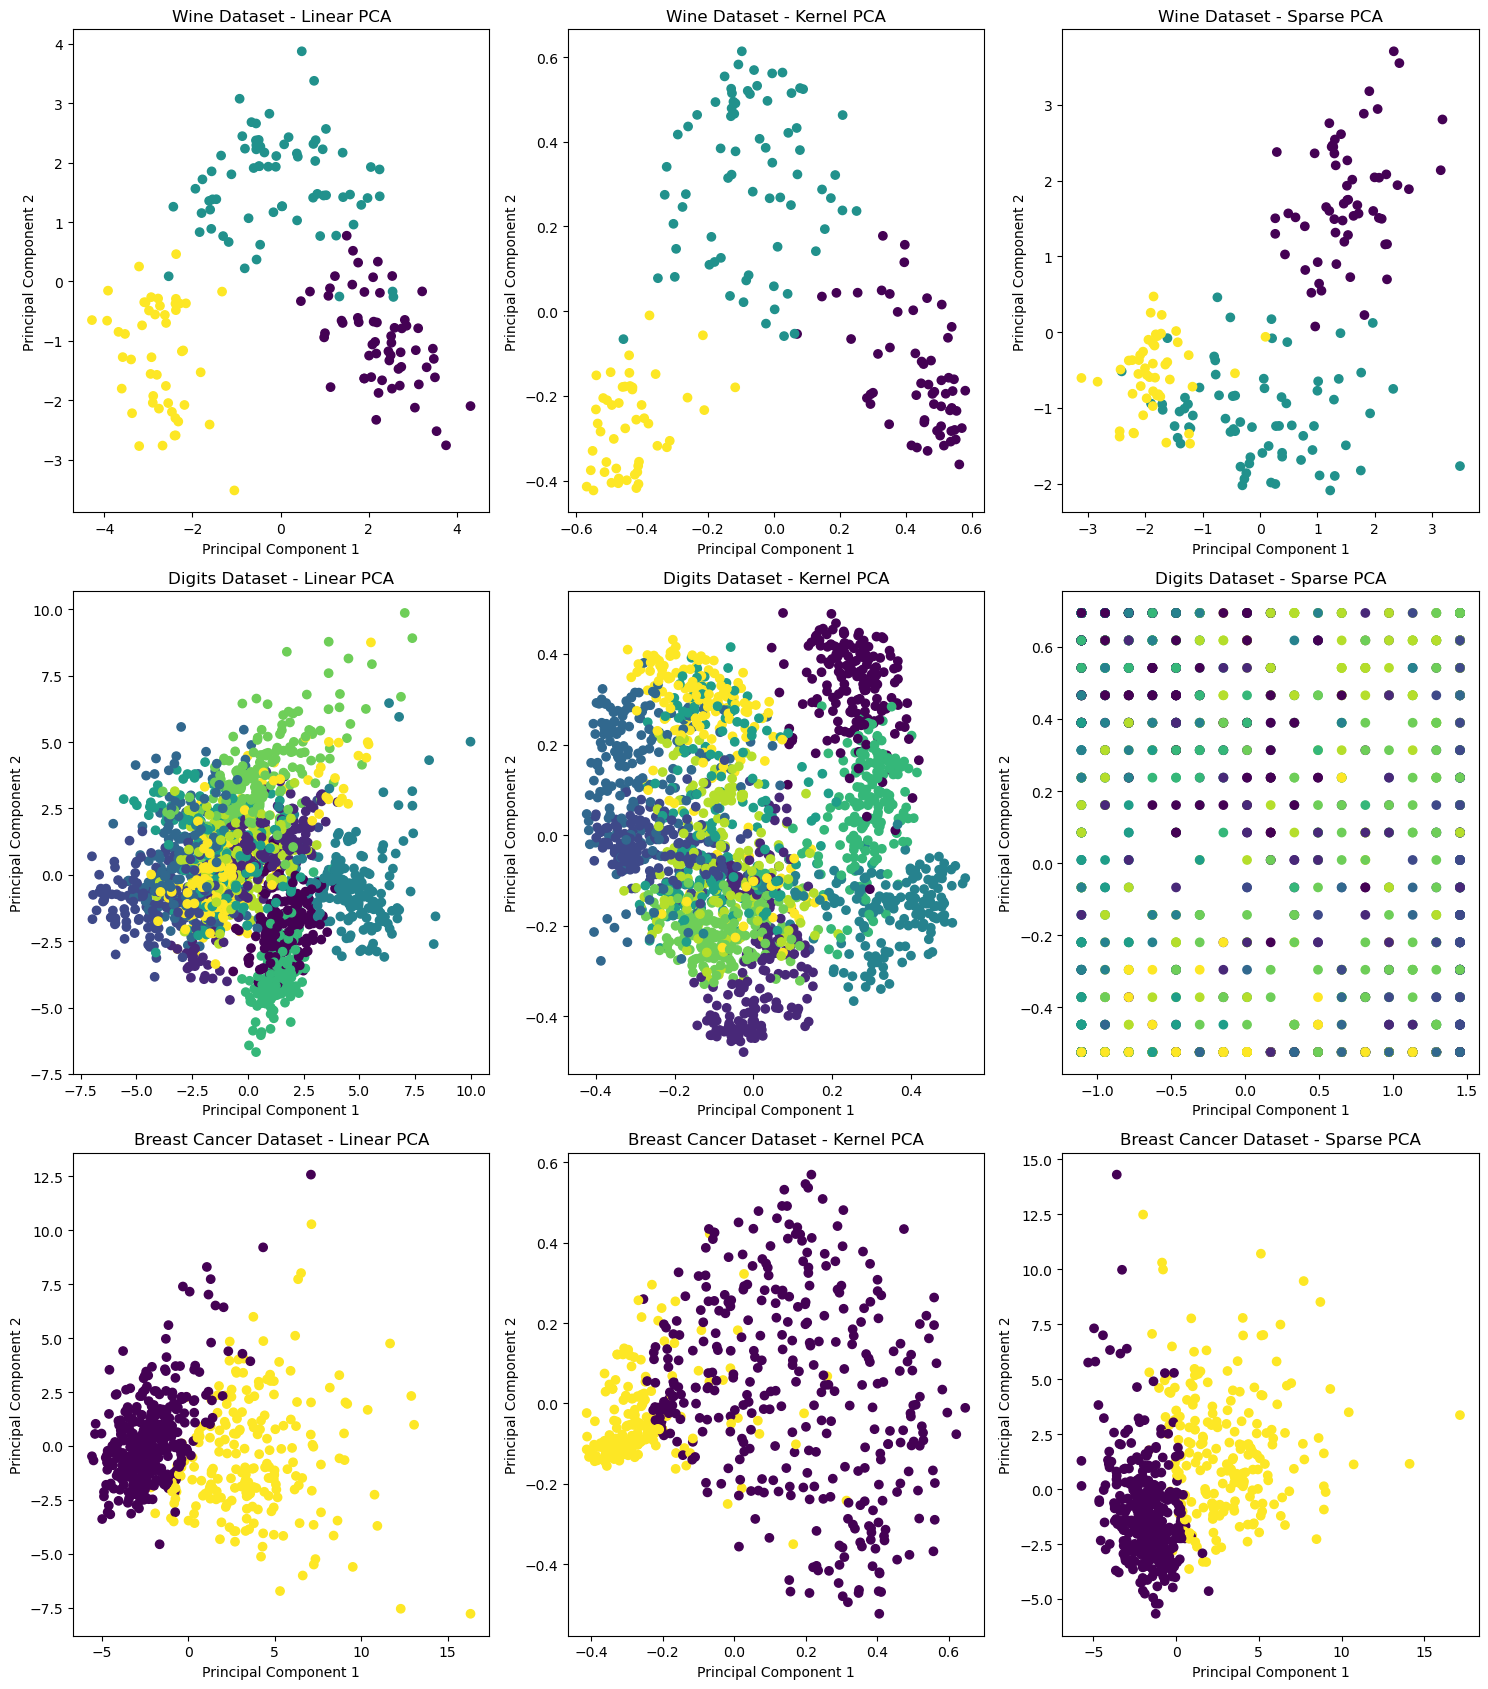

In [32]:
# wine dataset PC1 vs PC2 for linear, kernel and sparse PCA
# 1x3 grid

# linear pca
fig, ax = plt.subplots(3, 3, figsize=(15, 17))
plt.subplot(3, 3, 1)
plt.scatter(x=reduced_wine_data['PC1'], y=reduced_wine_data['PC2'], c=reduced_wine_data['class'], cmap='viridis')
plt.title('Wine Dataset - Linear PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# wine kernel pca
plt.subplot(3, 3, 2)
plt.scatter(x=wine_data_kpca[ : , 0], y=wine_data_kpca[ : , 1], c=reduced_wine_data['class'], cmap='viridis')
plt.title('Wine Dataset - Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# wine sparse pca
plt.subplot(3, 3, 3)
plt.scatter(x=wine_data_spca[ : , 0], y=wine_data_spca[ : , 1], c=reduced_wine_data['class'], cmap='viridis')
plt.title('Wine Dataset - Sparse PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# digits linear pca
plt.subplot(3, 3, 4)
plt.scatter(x=digits_lpca[:, 0], y=digits_lpca[:, 1], c=digits_target, cmap='viridis')
plt.title('Digits Dataset - Linear PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# digits kernel pca
plt.subplot(3, 3, 5)
plt.scatter(x=digits_kpca[:, 0], y=digits_kpca[:, 1], c=digits_target, cmap='viridis')
plt.title('Digits Dataset - Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# digits sparse pca
plt.subplot(3, 3, 6)
# Convert 'diagnosis' to numerical values
diagnosis_numeric = breast_cancer_data['diagnosis'].map({'M': 1, 'B': 0})

plt.scatter(x=digits_spca[:, 0], y=digits_spca[:, 1], c=digits_target, cmap='viridis')
plt.title('Digits Dataset - Sparse PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# breast cancer linear pca
plt.subplot(3, 3, 7)
plt.scatter(x=breast_cancer_data_pca[:, 0], y=breast_cancer_data_pca[:, 1], c=diagnosis_numeric, cmap='viridis')
plt.title('Breast Cancer Dataset - Linear PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# breast cancer kernel pca
plt.subplot(3, 3, 8)
plt.scatter(x=breast_cancer_data_kpca[:, 0], y=breast_cancer_data_kpca[:, 1], c=diagnosis_numeric, cmap='viridis')
plt.title('Breast Cancer Dataset - Kernel PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# breast cancer sparse pca
plt.subplot(3, 3, 9)
plt.scatter(x=breast_cancer_data_sparse_pca[:, 0], y=breast_cancer_data_sparse_pca[:, 1], c=diagnosis_numeric, cmap='viridis')
plt.title('Breast Cancer Dataset - Sparse PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

## Part 5: Principal Component Regression (PCR) on Boston Housing Dataset

### Task 5.1. Data Preparation

__Load the Boston Housing dataset, normalize the features, and apply PCA. How
many components are needed to explain 95% of the variance in the dataset?__

In [33]:
boston_data = pd.read_csv('./boston_housing_dataset.csv')

boston_data.columns = boston_data.columns.str.replace(' ', '_').str.lower()

x = boston_data.drop('medv', axis=1)
y = boston_data['medv']

scaler = StandardScaler()
scaler.fit(x)
boston_data_scaled = scaler.transform(x)

pca = PCA(n_components=0.95)
pca.fit(boston_data_scaled)
boston_data_pca = pca.transform(boston_data_scaled)

In [34]:

boston_data_pca.shape

(506, 9)

Thus, __9__ Principal Components are needed to explain 95% of the variance in the dataset.

### Task 5.2. Apply PCR

__Use the principal components obtained from PCA to fit a linear regression model. Compare the performance of PCR with a regular linear regression model using the same dataset. Report the Mean Squared Error (MSE) and $R^2$ score for both models.__

In [37]:
# fit a princpal component regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pca_regression_model = LinearRegression()
pca_regression_model.fit(boston_data_pca, y)

# calculate the R^2 score and RMSE
y_pred_pca = pca_regression_model.predict(boston_data_pca)
r2_pca = r2_score(y, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y, y_pred_pca))

print(f'R^2 Score: {r2_pca}', f'RMSE: {rmse_pca}', sep='\n')

R^2 Score: 0.7056708975511301
RMSE: 4.984689778970822


In [38]:
# regular linear regression
linear_regression = LinearRegression()
linear_regression.fit(x, y)

y_pred = linear_regression.predict(x)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'R^2 Score: {r2}', f'RMSE: {rmse}', sep='\n')

R^2 Score: 0.7406426641094095
RMSE: 4.679191295697281


In this case, it appears that the linear regression model using the features as-is, performs better than the PCR model.

This is confirmed by the fact that both, the R2 score and the RMSE are better for the linear regression model - which means that it fits the data better. However, a better approach would be to split the datasets into training and testing data, and conduct validation of each model on the test datasets. 